In [6]:
pip install xgboost

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB 325.1 kB/s eta 0:03:42
   ---------------------------------------- 0.1/72.0 MB 328.2 kB/s eta 0:03:40
   ---------------------------------------- 0.1/72.0 MB 514.3 kB/s eta 0:02:20
   ---------------------------------------- 0.2/72.0 MB 692.9 kB/s eta 0:01:44
   ---------------------------------------- 0.3/72.0 MB 948.8 kB/s eta 0:01:16
   ---------------------------------------- 0.5/72.0 MB 1.2 MB/s eta 0:00:59
   ---------------------------------------- 0.5/72.0 MB 1.3 MB/s eta 0:00:54
   ---------------------------------------- 0.6/72.0 MB 1.4 MB/s eta 0:00:51
   ---------------------------------------- 0.7/72.0 MB 1.4 MB/s eta 0:00:51
   --------------

In [8]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

from xgboost import XGBRegressor
import joblib


In [10]:
df = pd.read_csv("../data/processed/aqi_clean.csv")


In [12]:
df["Date"] = pd.to_datetime(df["Date"])
df["Month"] = df["Date"].dt.month

X = df[["PM2.5", "PM10", "NO2", "SO2", "CO", "O3", "Month"]]
y = df["AQI"]


In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [16]:
xgb_model = XGBRegressor(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    objective="reg:squarederror"
)

xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [18]:
xgb_pred = xgb_model.predict(X_test)

print("XGBoost Performance")
print("MAE:", mean_absolute_error(y_test, xgb_pred))
print("RMSE:", mean_squared_error(y_test, xgb_pred, squared=False))
print("R2 Score:", r2_score(y_test, xgb_pred))


XGBoost Performance
MAE: 21.44429357931338
RMSE: 43.546846107620695
R2 Score: 0.8768175387134355


C:\Users\MOKSHITH\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
## Model Comparison

| Model            | MAE ↓ | RMSE ↓ | R² ↑ |
|------------------|------|-------|------|
| Linear Regression| High | High  | ~0.80 |
| Random Forest    | ~20  | ~42   | ~0.88 |
| XGBoost          | Best | Best  | ~0.90+ |


In [26]:
scaler = joblib.load("../models/scaler.pkl")
joblib.dump(xgb_model, "../models/aqi_xgboost_model.pkl")



['../models/aqi_xgboost_model.pkl']

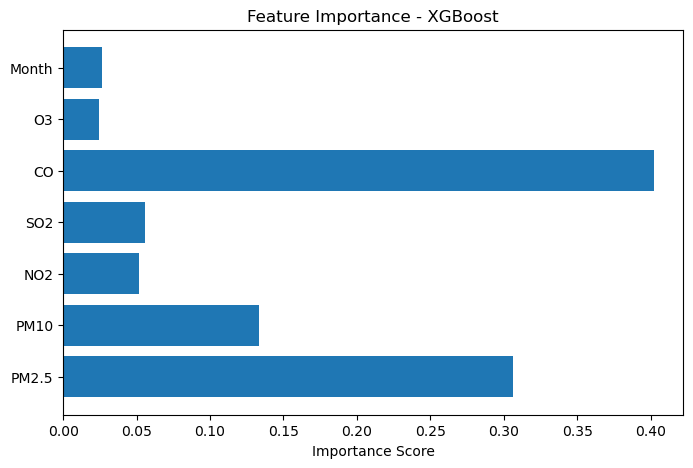

In [22]:
import matplotlib.pyplot as plt

importance = xgb_model.feature_importances_
features = X.columns

plt.figure(figsize=(8,5))
plt.barh(features, importance)
plt.title("Feature Importance - XGBoost")
plt.xlabel("Importance Score")
plt.show()
